### ParlSpeech V2 data set 

The data set used in this thesis is the ParlSpeech V2 data set, containing speeches of 9 European parliaments, including the Austrian Nationalrat. The Austrian data was web scraped on the 26.11.2019 and includes speeches from January 1996 until December 2018. As the project worked with R, the data set is saved as an .rds file. 

[https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/L4OAKN]

In [1]:
#load libraries
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import pandas as pd

In [2]:
# creating requirment file for used libraries
#pip freeze > requirements.txt

[https://www.geeksforgeeks.org/how-to-create-requirements-txt-file-in-python/]

[https://www.geeksforgeeks.org/using-jupyter-notebook-in-virtual-environment/]


check& set up virtual enviroment

rpy2 library to read the rds file 
that was downloaded here: 
[https://rpy2.github.io/]

In [3]:
readRDS = robjects.r['readRDS']
df = readRDS('data\Corp_Nationalrat_V2.rds')
df = pandas2ri.rpy2py_dataframe(df)

In [ ]:
#df.head()
#df.shape

In [ ]:
#speaker_list= df['speaker'].unique()
#pattern= r'(\w+ \w+$)'
#df['speaker'] = df['speaker'].str.extract(pattern)

In [ ]:
#check number of speakers, clean from Titles, other names by only taking the last two words of the name.
#cleaned_speaker_list= df['speaker'].unique()
#print(len(cleaned_speaker_list))
#print(len(speaker_list))

In [4]:
#replacing party names, as Jetzt - Liste PILZ, JETZT and PILZ are all one party
df['party']= df['party'].replace(to_replace='Jetzt – Liste PILZ', value='PILZ', regex=True)
df['party']= df['party'].replace(to_replace='JETZT', value='PILZ', regex=True)
#df['party'].unique()

#### thoughts on data storge

[https://medium.com/@reza.shokrzad/pickle-json-or-parquet-unraveling-the-best-data-format-for-speedy-ml-solutions-10c3f7bf4d0c]
Reading about the different kinds to store data, loading RFS Files just takes very long. I would like to shorten the process so I want to save the data after preprocessing it. Maybe Pickle is the best or tensor? 

Will have to read more.Definitely not JSON. 
[https://www.jumpingrivers.com/blog/arrow-rds-parquet-comparison/]
Might have to look at parquet

Most probably Pickle.

Datensatz hat folgende Spalten: <br>
date <br>
agenda<br>
speechnumber<br>
speaker<br>
party<br>
party.facts.id<br>
chair<br>
term<br>
text<br>
parliament<br>
iso3country<br>

##### Notes on data exploration

We want to get to know the data set a bit better: <br>

* How many speeches are there? 
* How long are they? 
* How long are they for each party? 
* How many speeches does each party have?
* How many mps does each party have? 
* How much do single MPs speak?/How much do they speak individually compared to MPs of other parties? 
* Which agendas do they speak most about? <p/>

* How many speeches are there for each legislation period?
* Also all the other questions for each period.<p/>

* How many MPs changed party? 
* How many MPs where not party affiliated anymore? <p/>

* How long are government members speeches compared to MPs speeches? 



In [9]:
import matplotlib.pyplot as plt

import regex as re

NA_character_    109707
SPÖ               24747
ÖVP               24063
FPÖ               17308
Grüne             12455
BZÖ                4170
LIF                1942
NEOS               1866
independent        1555
STRONACH           1322
PILZ                346
Name: party, dtype: int64


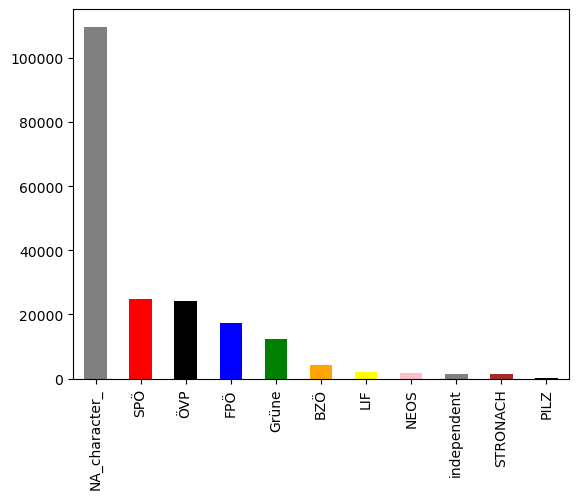

In [6]:
#visualise parties/speech distribution
df['party'].value_counts().plot(kind='bar',color=['grey','red','black','blue','green','orange','yellow','pink','grey','brown','black'])
print(df['party'].value_counts())
plt.show()

#### Comments on the distribution of the parties 

Most speeches are held by NA, in this case that means, that the speakes where not talking in their role as an MP but rather as part of the government. 

We can have a closer look at the speakers without party to find out if they are just persons that have been MPs before or other, non assosiated persons. 

As this is meant to train a text classification for party affiiliation, the speakers that can be affiliated with a party will be added to the party they where a member of, even if they were originally not tagged with that party in the data.

How many speeches are held by the Präsident of the parliament? 

In [28]:
#check how many speeches are held by the president of parliament
search = "präsident"
df['count_president']= df["speaker"].str.count(search, re.I)
print(df['count_speaker'].sum())

search_2 = "bundesminister"
df['count_minister']= df["speaker"].str.count(search_2, re.I)
print(df['count_minister'].sum())

search_3 = "schriftführer"
df['count_scribe'] = df["speaker"].str.count(search_3, re.I)
print(df['count_scribe'].sum())

print(df['count_scribe'].sum()+ df['count_speaker'].sum())

109555
9624
152
109707


Looking at the speeches held by the ministers of parliament and the scribes, those are the speeches that have no party affiliation. 

We can have a closer look at those speeches maybe at another point, for now, we want to filter those speeches out of our data. 

In [33]:
df = df[df['count_president']<1]
df = df[df['count_scribe']<1]
# number of actual speeches to be used
print(df.shape)

(89774, 15)


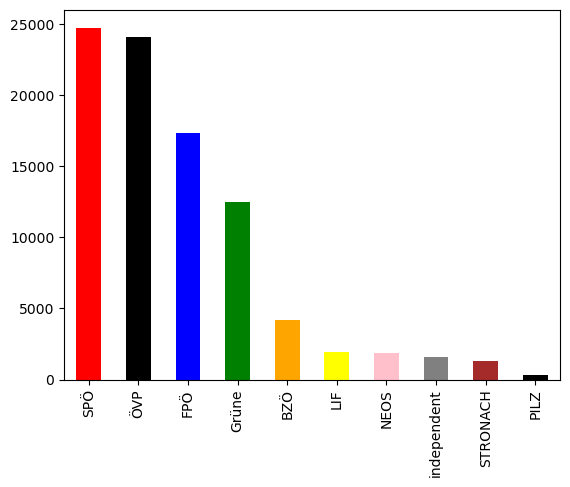

In [68]:
#visualise parties/speech distribution
df['party'].value_counts().plot(kind='bar',color=['red','black','blue','green','orange','yellow','pink','grey','brown','black'])
#print(df['party'].value_counts())
plt.show()

In [39]:
speaker_list= df['speaker'].unique()
pattern= r'(\w+ \w+$)'
df['speaker'] = df['speaker'].str.extract(pattern)

In [67]:
#check number of speakers, clean from Titles, other names by only taking the last two words of the name.
#cleaned_speaker_list= df['speaker'].unique()
#print(len(cleaned_speaker_list))
#print(len(speaker_list))

In [69]:

#visualise mp/speeches distribution

#df['speaker'].value_counts().plot(kind='bar')
#plt.show()
#looks horribe! not sure how to make better

In [66]:
mean_speech_length= df['terms'].mean()

#print("Mean of speech length: {}".format(mean_speech_length))

#print("Overall speech length:\n shortest 5 % :  {0} words, \n longest 5 % percent: {1} words,\n 1st quantile : {2} words,\n 3rd quantile: {3} words \n median : {4} words \n standard deviation : {5} words".format(df['terms'].quantile(0.05),df['terms'].quantile(0.95),df['terms'].quantile(0.25),
      #df['terms'].quantile(0.75),df['terms'].median(),df['terms'].std()))

#print("Overview on speech length:\n {}".format(df['terms'].describe()))

In [61]:
filtered_speechlength= [i for i in df['terms'] if i > 46]
long_speeches=[i for i in df['terms'] if i > 2000]
speeches_over_BERtlength= [i for i in df['terms'] if i > 512]
print("Amount of speeches")
print("total: {}".format(len(df['terms'])))
print(">2000 words: {}".format(len(long_speeches)))
print(">13 words: {}".format(len(filtered_speechlength)))
print(">521 words:{}".format(len(speeches_over_BERtlength)))

print("Amount of words")     
print("Total: {}".format(sum(df['terms'])))
print("Without shortest 5% of speeches: {}".format(sum(filtered_speechlength)))

Amount of speeches
total: 89774
>2000 words: 1725
>13 words: 85157
>521 words:42330
Amount of words
Total: 52094997.0
Without shortest 5% of speeches: 51959203.0


In [64]:
#show speech length boxplot
#data= [df['terms'].std(),df['terms'].median(),df['terms'].quantile(0.75),df['terms'].quantile(0.25)]
#fig1, ax1 = plt.subplots()
#ax1.set_title('speechlength overall')
#ax1.boxplot(data)
#plt.show()

#### thoughts and questions: 

* Are 89774 speeches enough material?
* Is the distribution ok? 
* Is the lenght ok? 
* Should I ignore the 5% shortest speeches (<46 words)
* would just progress with this as it is now